<a href="https://colab.research.google.com/github/TatyanaPythonista/wine_net/blob/main/wine_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [32]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    wine.data[:, :13],
    wine.target,
    test_size=0.3,
    shuffle=True
)

x_train = torch.FloatTensor(x_train)  # FloatTensor - для дробных
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)  # LongTensor - для не дробных
y_test = torch.LongTensor(y_test)

In [51]:
class WineNet(torch.nn.Module):

  def __init__(self, n_hidden_neurons):
    super().__init__()

    self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
    self.activ1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    #self.activ2 = torch.nn.Sigmoid()
    #self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.sm = torch.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.activ1(x)
    x = self.fc2(x)
    #x = self.activ2(x)
    #x = self.fc3(x)
    return x

  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x

wine_net = WineNet(14)


In [52]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.001)

In [ ]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [53]:
batch_size = 10

for epoch in range(10000):
  order = np.random.permutation(len(x_train))
  for start_index in range(0, len(x_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    x_batch = x_train[batch_indexes]
    y_batch = y_train[batch_indexes]

    preds = wine_net.forward(x_batch)

    loss_val = loss(preds, y_batch)
    loss_val.backward()

    optimizer.step()

  if epoch % 100 == 0:
    test_preds = wine_net.forward(x_test)
    test_preds = test_preds.argmax(dim=1)
    print((test_preds == y_test).float().mean())


tensor(0.2222)
tensor(0.8704)
tensor(0.9074)
tensor(0.9074)
tensor(0.9259)
tensor(0.9259)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9630)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9444)
tensor(0.9

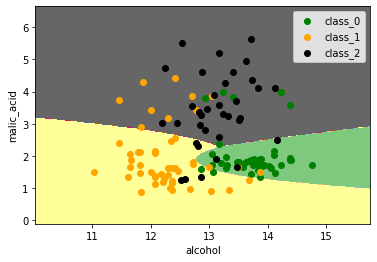

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] == (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

xx, yy = torch.meshgrid(torch.arange(x_min, x_max, plot_step), 
                        torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
)

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
  indexes = np.where(y_train == i)
  plt.scatter(x_train[indexes, 0],
              x_train[indexes, 1],
              c=color,
              label=wine.target_names[i],
              cmap='Accent')
  
  plt.xlabel(wine.feature_names[0])
  plt.ylabel(wine.feature_names[1])
  plt.legend()